<a href="https://colab.research.google.com/github/shahjamanbadhon/Data-Mining/blob/main/CNN_keras_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the necessary modules
from keras.datasets import mnist
import numpy as np

In [2]:
#loading data
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Training data:


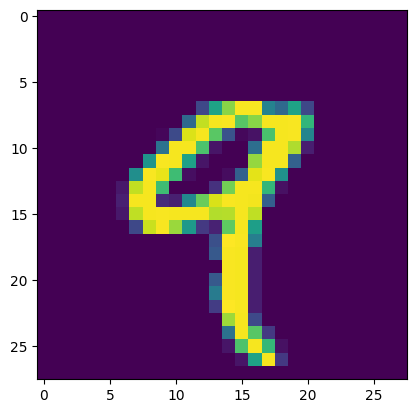

Label of this image is 9


In [3]:
#What mnist images look like
import matplotlib.pyplot as plt
print("Training data:")
plt.imshow(xtrain[4])
plt.show()
print("Label of this image is",ytrain[4])

In [4]:
#reshaping data as needed by the model
xtrain=np.reshape(xtrain,(-1,28,28,1))
xtest=np.reshape(xtest,(-1,28,28,1))
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [5]:
#normalising
xtrain=xtrain/255
xtest=xtest/255

In [7]:
#implementing one hot encoding
from keras.utils import to_categorical
y_train = to_categorical(ytrain, num_classes=10)
y_test = to_categorical(ytest, num_classes=10)

In [8]:
#importing the model
from keras.models import Sequential

In [9]:
#creating model object
model=Sequential()

In [10]:
#importing layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [11]:
#adding layers and forming the model
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [15]:
#training the model
model.fit(xtrain,y_train,batch_size=100,epochs=10,validation_data=(xtest,y_test))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9965 - loss: 0.0107 - val_accuracy: 0.9909 - val_loss: 0.0296
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9977 - loss: 0.0076 - val_accuracy: 0.9919 - val_loss: 0.0290
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9976 - loss: 0.0067 - val_accuracy: 0.9922 - val_loss: 0.0266
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9975 - loss: 0.0073 - val_accuracy: 0.9930 - val_loss: 0.0269
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9983 - loss: 0.0056 - val_accuracy: 0.9919 - val_loss: 0.0316
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9983 - loss: 0.0055 - val_accuracy: 0.9886 - val_loss: 0.0474
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9984 - loss: 0.0053 - val_accuracy: 0.9901 - val_loss: 0.0442
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9986 - loss: 0.0052 - val_accuracy: 0.

In [16]:
#model train and test scores
model.evaluate(xtrain,y_train),model.evaluate(xtest,y_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9994 - loss: 0.0029
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9904 - loss: 0.0440


([0.0022884830832481384, 0.9994333386421204],
 [0.0304341372102499, 0.9929999709129333])